# Exercícios - Limpeza e Preparação dos Dados 🏗️ 🎲

Vamos trabalhar hoje com a limpeza e a organização de um *dataset* de qualidade de vinhos 🍷. Iremos recordar alguns conceitos vistos na aula passada e exercitar a detecção e o tratamento de *outliers*. Você pode conferir a descrição do conjunto de dados através do *link* abaixo: 

```
Dataset de qualidade de vinhos: https://archive.ics.uci.edu/dataset/186/wine+quality
```

## Carga e preparação do dataset
Carregue o *dataset* que descreve a qualidade de vinhos tintos a partir da seguinte url:
```
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
```


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Carrega o dataset
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

Estude o *dataset* com as funções vistas nas aulas passadas (como **head()**, **describe()** e **info()**).

In [25]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Verifique e remova, se houver, linhas duplicadas no *dataset*.

In [28]:
red_wine[red_wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [29]:
# Tratando linhas duplicadas
print(red_wine.duplicated().sum())  # verifica se há linhas duplicadas
#red_wine = red_wine.drop_duplicates()  # remove as linhas duplicadas
red_wine.drop_duplicates(inplace=True)  # remove as linhas duplicadas, utilizando o argumento inplace = True. O efeito é o mesmo da linha acima

240


Você percebeu que este *dataset* não possui valores nulos? Assim não tem graça! Dificilmente encontraremos *datasets* assim como analistas de dados... 🤷🏻‍♀️ Então vamos introduzir alguns valores nulos só para tratarmos deles. Atribua o valor `None` das linhas 10 a 20 na coluna `fixed acidity` e verifique novamente a presença de valores nulos imprimindo na saída a quantidade de linhas nulas por coluna.

In [30]:
# Tratando valores nulos
red_wine.loc[10:20, 'fixed acidity'] = None  # artificialmente inserindo valores nulos

In [31]:
# Verificando que os valores forem efetivamente anulados.
print(red_wine.isnull().sum())

fixed acidity           10
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64


Agora precisamos decidir o que faremos com os valores nulos. Vamos verificar como é a distribuição da variável `fixed acidity`? Plote um boxplot desta coluna. Decida que método você utilizará para preencher os valores nulos (ou você prefere descartá-los?)

/Users/kalinarabbani/.pyenv/versions/3.10.6/envs/enap/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


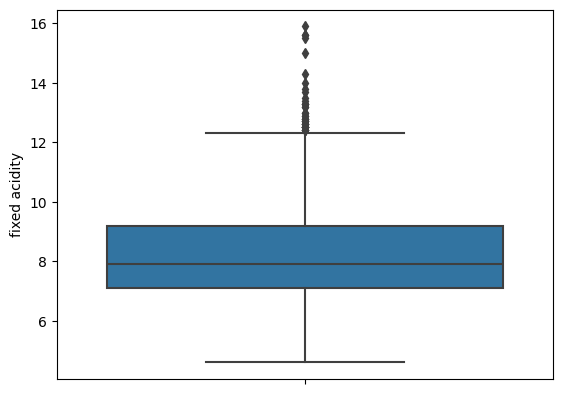

In [32]:
# Visualizando outliers com um boxplot.
sns.boxplot(y='fixed acidity', data=red_wine)
plt.show()

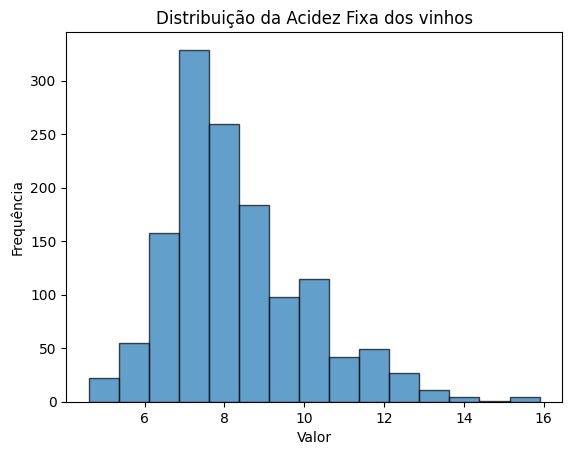

In [34]:
#Vamos verificar da distribuição através de um histograma!
import matplotlib.pyplot as plt

# Cria o histograma
plt.hist(red_wine['fixed acidity'], bins=15, edgecolor="k", alpha=0.7)

# Adiciona titulos e rotulos
plt.title("Distribuição da Acidez Fixa dos vinhos")
plt.xlabel("Valor")
plt.ylabel("Frequência")

# Exibe o histograma
plt.show()

In [35]:
#Percebemos, pelo gráfico acima, que os dados estão distribuídos de forma assimétrica, com a mediana mais próxima do 
#limite inferior. Isso indica que há uma tendência de valores maiores para a variável 'fixed acidity', com a 'calda' direita
#do histograma mais alongada. Alem disso,
#há alguns outliers, que são os pontos que estão fora dos limites inferior e superior do boxplot. Desta forma,
#iremos substituir os valores nulos pela mediana, que é menos sensível a outliers.
red_wine['fixed acidity'].fillna(red_wine['fixed acidity'].median(), inplace=True)

Detectando e filtrando os valores outliers.
1. Calcule o IQR para a coluna ```fixed acidity``` e identifique os outliers.
2. Determine o que você fará com os outliers (substituir os valores ou removê-los?)

In [36]:
#Identificando os outliers. Para isso, iremos utilizar o método IQR (Interquartile Range), que é a diferença entre
#o terceiro e o primeiro quartil. Valores que estão abaixo do limite inferior (Q1 - 1.5 * IQR) ou acima do limite
#superior (Q3 + 1.5 * IQR) são considerados outliers.
Q1 = red_wine['fixed acidity'].quantile(0.25)
Q3 = red_wine['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = red_wine[(red_wine['fixed acidity'] < limite_inferior) | (red_wine['fixed acidity'] > limite_superior)]

In [37]:
outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
359,12.6,0.380,0.66,2.6,0.088,10.0,41.0,1.00100,3.17,0.68,9.8,6


In [38]:
# Substituindo os outliers pela mediana.
red_wine.loc[(red_wine['fixed acidity'] < (Q1 - 1.5 * IQR)) | (red_wine['fixed acidity'] > (Q3 + 1.5 * IQR)), 'fixed acidity'] = red_wine['fixed acidity'].median()

# Ou remova os outliers, caso deseje.
# red_wine = red_wine[~((red_wine['fixed acidity'] < (Q1 - 1.5 * IQR)) | (red_wine['fixed acidity'] > (Q3 + 1.5 * IQR)))]